## 📊 Volatility Modeling Using GARCH
In this notebook, we focus on analyzing and modeling **volatility** in financial time series using the **GARCH(1,1)** model. Understanding volatility is essential for evaluating market risk, making financial forecasts, and managing portfolios.

### 🔹 Step 1: Import Required Libraries
The first step involves importing essential Python packages. The `arch` package is used for volatility modeling with ARCH/GARCH models.

## VOLATILITY MODELLING

### 🔹 Step 2: Load and Prepare Data
Next, we prepare our dataset by calculating **logarithmic returns**, which are commonly used in volatility analysis over raw prices.

Volatility modeling forecasts the risk, answering the question, how much the stock is willing to swing in the near future. High volatility means higher risk, and low volatility means lower risk. 

### **GARCH** model.

**GARCH** (**G**eneralized **A**utoregressive **C**onditional **H**eteroskedasticity): This is the standard model for volatility forecasting. It works by modeling the variance (the square of the price changes) over time, recognizing that periods of high volatility tend to be clustered together.

It provides a measure of risk. Investors want to know not just if a stock will go up, but how bumpy the ride will be.

what we are finding is the variance or standard deviation of the stock's returns, in this case SAFARICOM, a well-known, frequently traded stock.

### 🔹 Step 3: Define and Fit GARCH(1,1) Model
We specify and fit a **GARCH(1,1)** model, one of the most popular models for capturing time-varying volatility in financial data. This is a standard volatility model that accounts for conditional heteroskedasticity in financial returns.

In [16]:
#import libraries
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt


# Load the cleaned data
df = pd.read_csv('NSE_2021_2024_Final.txt')

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the stock to model (e.g., Safaricom)
stock_df = df[df['Code'] == 'SCOM'].copy()

# Calculate daily returns
stock_df['Returns'] = np.log(stock_df['Day Price'] / stock_df['Day Price'].shift(1))

# Drop missing values that result from the shift()
stock_df.dropna(inplace=True)

# scale returns by 100 for GARCH modeling
returns = stock_df['Returns'] * 100

print(returns.head())

Date
2021-01-05    0.437000
2021-01-06    1.729150
2021-01-07   -0.142959
2021-01-11    0.000000
2021-01-12   -0.143164
Name: Returns, dtype: float64


## Fit the GARCH Model

### 🔹 Step 4: Interpret Model Output
This summary includes the estimated coefficients for the constant term, ARCH (α), and GARCH (β) components. We check their statistical significance and if α + β < 1.

The p=1 means, to use the previous day's volatility to help predict today's volatility.

The q=1 means, to use the previous day's squared error to help predict today's volatility.

### 🔹 Step 5: Plot Conditional Volatility
This visualization represents how the model's estimated volatility evolves over time.

In [15]:
# Define and fit the GARCH(1,1) model
# p=1, q=1 is the standard choice
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()

# model summary
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2277.903017525861
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2045.1867306385634
Iteration:      3,   Func. Count:     20,   Neg. LLF: 3150.951193330947
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1998.7145757420685
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1943.094566895643
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1943.064762741743
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1942.655553436092
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1942.6555478930445
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1942.6555478935825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1942.6555478930445
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:           

### 🔹 Step 6: Model Diagnostics
We analyze standardized residuals and their autocorrelation to evaluate how well the model fits.

## Forecast Future Volatility

In [ ]:
# Plot standardized residuals and their ACF
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

std_resid = res.std_resid.dropna()
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(std_resid)
ax[0].set_title('Standardized Residuals')
plot_acf(std_resid, ax=ax[1])
plt.tight_layout()
plt.show()

In [18]:
# Forecast volatility for the next 30 days
forecast = model_fit.forecast(horizon=30)

# forecast object contains the predicted variance. We need the square root to get volatility (standard deviation).

mean_forecast = forecast.variance.iloc[-1]
predicted_daily_volatility = np.sqrt(mean_forecast)

print("Forecasted 30-day volatility (standard deviation):")
print(predicted_daily_volatility)

Forecasted 30-day volatility (standard deviation):
h.01    1.299068
h.02    1.420739
h.03    1.519478
h.04    1.601096
h.05    1.669415
h.06    1.727128
h.07    1.776215
h.08    1.818189
h.09    1.854229
h.10    1.885280
h.11    1.912106
h.12    1.935333
h.13    1.955484
h.14    1.972992
h.15    1.988225
h.16    2.001494
h.17    2.013062
h.18    2.023156
h.19    2.031971
h.20    2.039672
h.21    2.046405
h.22    2.052293
h.23    2.057445
h.24    2.061954
h.25    2.065902
h.26    2.069359
h.27    2.072387
h.28    2.075040
h.29    2.077364
h.30    2.079402
Name: 2024-12-31 00:00:00, dtype: float64


### 🔹 Step 7: Volatility Forecasting
Lastly, we use the model to project future volatility levels, helping us estimate potential market risk.

In [19]:
# Calculate annual volatility (assuming 252 trading days in a year)
annual_volatility = predicted_daily_volatility * np.sqrt(252)
print("Forecasted 30-day annualized volatility (standard deviation)")
print(annual_volatility)

Forecasted 30-day annualized volatility (standard deviation)
h.01    20.622058
h.02    22.553529
h.03    24.120973
h.04    25.416607
h.05    26.501149
h.06    27.417308
h.07    28.196546
h.08    28.862848
h.09    29.434974
h.10    29.927892
h.11    30.353735
h.12    30.722465
h.13    31.042343
h.14    31.320280
h.15    31.562097
h.16    31.772726
h.17    31.956367
h.18    32.116609
h.19    32.256533
h.20    32.378790
h.21    32.485667
h.22    32.579140
h.23    32.660923
h.24    32.732503
h.25    32.795171
h.26    32.850051
h.27    32.898121
h.28    32.940235
h.29    32.977137
h.30    33.009477
Name: 2024-12-31 00:00:00, dtype: float64


In [ ]:
# Forecast volatility for the next 5 days
forecast = res.forecast(horizon=5)
print(forecast.variance[-1:])

## Visualization

Plot the daily returns alongside the conditional volatility from our model.

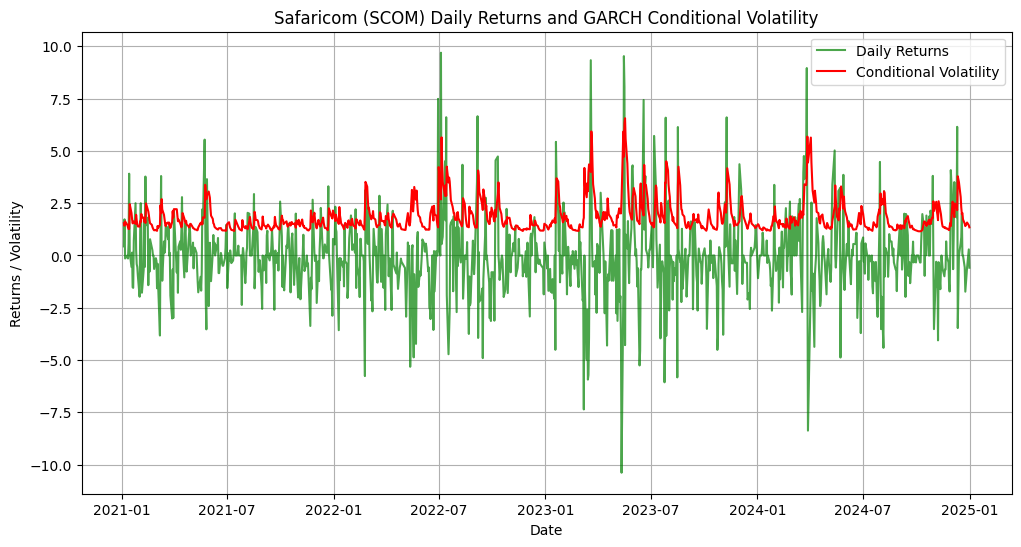

In [21]:
# Plot 1: Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns, label='Daily Returns', color='green', alpha=0.7)

# Plot conditional volatility from the GARCH model
plt.plot(model_fit.conditional_volatility.index, model_fit.conditional_volatility, label='Conditional Volatility', color='red')

plt.title('Safaricom (SCOM) Daily Returns and GARCH Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Returns / Volatility')
plt.legend()
plt.grid(True)
plt.savefig('garch_volatility_plot.png')
plt.show()

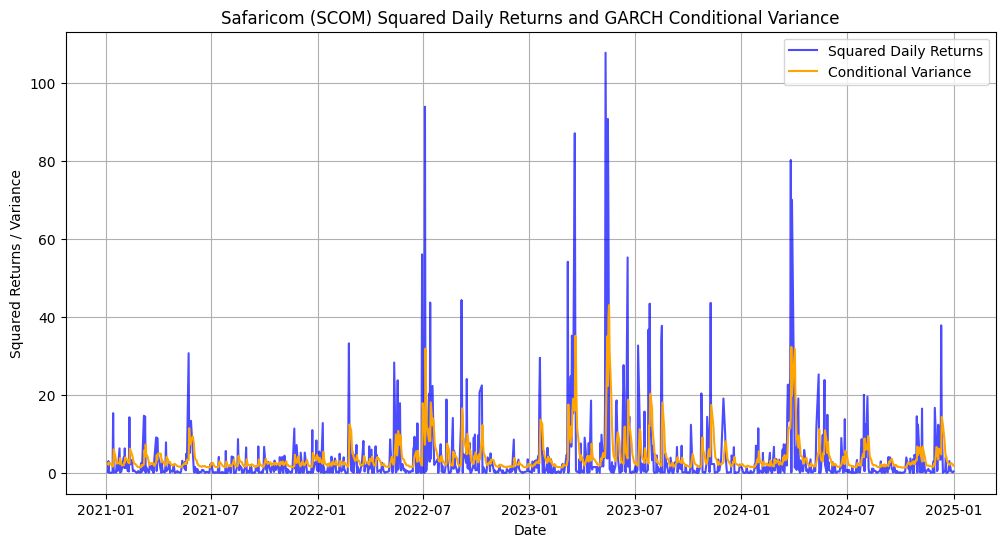

In [23]:
# Plot 2: Squared Returns and Conditional Variance
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns**2, label='Squared Daily Returns', color='blue', alpha=0.7)

# Plot conditional volatility from the GARCH model
plt.plot(returns.index, model_fit.conditional_volatility**2, label='Conditional Variance', color='orange')
plt.title('Safaricom (SCOM) Squared Daily Returns and GARCH Conditional Variance')
plt.xlabel('Date')
plt.ylabel('Squared Returns / Variance')
plt.legend()
plt.grid(True)
plt.savefig('garch_variance_plot.png')
plt.show()